In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from numpy.linalg import eigh, slogdet
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns

In [ ]:
# FIGURE 4.2

def uniformeCercle(size : int, random_seed : int = None) :
  if random_seed is not None:
    np.random.seed(random_seed)
  theta = np.random.uniform(0, 2*np.pi, size = size)
  r = np.sqrt(np.random.uniform(0, 1, size=size))
  X1, X2 = r * np.cos(theta), r * np.sin(theta)
  return np.column_stack((X1, X2))


N = 300
Z1 = (1, 1) + uniformeCercle(size = N//3, random_seed = 0)*0.6
Z2 = (2, 2) + uniformeCercle(size = N//3, random_seed = 1)*0.6
Z3 = (3, 3) + uniformeCercle(size = N//3, random_seed = 2)*0.6
Z = np.concat((Z1, Z2, Z3))
Y = np.concat((np.zeros(len(Z1)), np.ones(len(Z2)), 2*np.ones(len(Z3)))).astype(int)
Ys = np.zeros((N, 3))
Ys[:N//3, 0] = 1
Ys[N//3:2*N//3, 1] = 1
Ys[2*N//3:, 2] = 1


In [ ]:
# Linear Model 2
model1= LinearRegression()
model1.fit(Z, Ys)

# Linear Model 3
model2 = LinearDiscriminantAnalysis()
model2.fit(Z, Y)

# Linear Model 3
Z_new = np.column_stack((Z, Z**2, Z[:, 0]*Z[:, 1]))
model3 = LinearRegression().fit(Z_new, Ys)


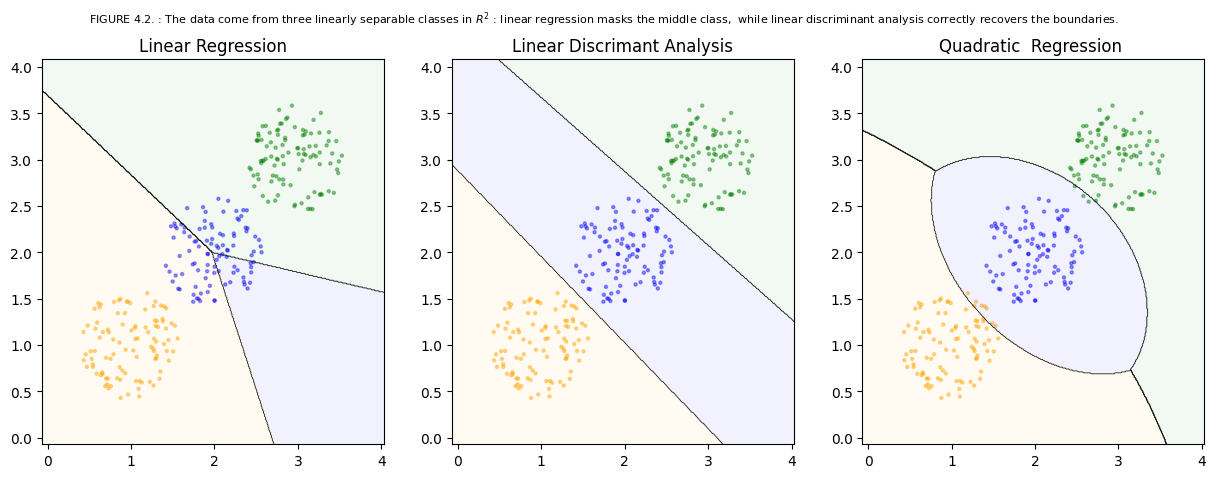

In [ ]:
xmin, xmax = Z[:, 0].min()-0.5, Z[:, 0].max()+0.5
ymin, ymax = Z[:, 1].min()-0.5, Z[:, 1].max()+0.5
x = np.linspace(xmin, xmax, 1000)
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 400),
                     np.linspace(ymin, ymax, 400))



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
colors = np.array(['orange', 'blue', 'green'])


ax1.scatter(Z[:, 0], Z[:, 1], c=colors[Y.astype(int)], alpha = 0.4, s = 5)
zz1 = np.argmax(model1.predict(np.c_[xx.ravel(), yy.ravel()]), axis=1).reshape(xx.shape)
ax1.contour(xx, yy, zz1, levels=np.unique(zz1), colors='k', linewidths=0.5)
cmap = plt.cm.colors.ListedColormap(['orange', 'blue', 'green'])
ax1.contourf(xx, yy, zz1, alpha=0.05, cmap=cmap)
ax1.set_ylim(ymin, ymax)
ax1.set_title('Linear Regression')


ax2.scatter(Z[:, 0], Z[:, 1], c=colors[Y.astype(int)], alpha = 0.4, s = 5)
zz2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contour(xx, yy, zz2, levels=np.unique(zz2), colors='k', linewidths=0.5)
cmap = plt.cm.colors.ListedColormap(['orange', 'blue', 'green'])
ax2.contourf(xx, yy, zz2, alpha=0.05, cmap=cmap)
ax2.set_ylim(ymin, ymax)
ax2.set_title('Linear Discrimant Analysis')


ax3.scatter(Z[:, 0], Z[:, 1], c=colors[Y.astype(int)], alpha = 0.4, s = 5)
ZZ = np.c_[xx.ravel(), yy.ravel()]
ZZ = np.column_stack((ZZ, ZZ**2, ZZ[:, 0]*ZZ[:, 1]))
zz3 = np.argmax(model3.predict(ZZ), axis = 1).reshape(xx.shape)
ax3.contour(xx, yy, zz3, levels=np.unique(zz3), colors='k', linewidths=0.5)
cmap = plt.cm.colors.ListedColormap(['orange', 'blue', 'green'])
ax3.contourf(xx, yy, zz3, alpha=0.05, cmap=cmap)
ax3.set_ylim(ymin, ymax)
ax3.set_title('Quadratic  Regression ')

fig.suptitle('FIGURE 4.2. : The data come from three linearly separable classes in $R^2$ : linear regression masks the middle class,  while linear discriminant analysis correctly recovers the boundaries.', size = 8)
plt.show()

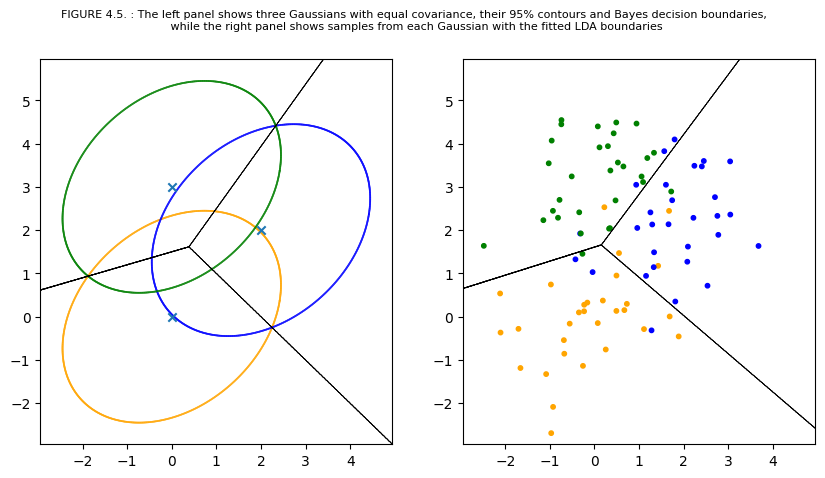

In [ ]:
from scipy.stats import chi2
from scipy.linalg import sqrtm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('FIGURE 4.5. : The left panel shows three Gaussians with equal covariance, their 95% contours and Bayes decision boundaries, \n while the right panel shows samples from each Gaussian with the fitted LDA boundaries', size = 8)


sigma2 = np.array([[1, 0.3], [0.3, 1]])
sigma  = sqrtm(sigma2)
mu1, mu2, mu3 = 2*np.array([0, 0]), 2*np.array([1, 1]), 2*np.array([0, 1.5])
mu = np.vstack((mu1, mu2, mu3))



## LEFT PANEL

theta = np.linspace(0, 2*np.pi, 1000)
zz = np.c_[np.cos(theta), np.sin(theta)]
r = np.sqrt(chi2.ppf(0.95, df=2))
zz1, zz2, zz3 = r * zz @ sigma + mu1, r * zz @ sigma + mu2, r * zz @ sigma + mu3
zz = np.concat([zz1, zz2, zz3])
yy = np.concat([np.zeros(len(zz1)), np.ones(len(zz2)), 2*np.ones(len(zz3))]).astype(int)
ax1.scatter(zz[:, 0], zz[:, 1], color = colors[yy], s = 0.1)
ax1.scatter(mu[:, 0], mu[:, 1], marker = 'x')

xmin, xmax = zz[:, 0].min() - 0.5, zz[:, 0].max() + 0.5
ymin, ymax = zz[:, 1].min() - 0.5, zz[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
zz = np.c_[xx.flatten(), yy.flatten()]

# Bayesian Boundaries
# Linear discriminant δ_k(x) for all grid points
# δ_k(x) = x^T Σ^{-1} μ_k - 1/2 μ_k^T Σ^{-1} μ_k + cte
sigma2_inv = np.linalg.inv(sigma2)
quad_terms = np.einsum('ij,jk,ik->i', mu, sigma2_inv, mu)
lin_parts = zz @ (sigma2_inv @ mu.T)
deltas = lin_parts - 0.5*quad_terms
zz = np.argmax(deltas, axis=1).reshape(xx.shape)
ax1.contour(xx, yy, zz, colors = 'k', linewidths = 0.5)

## RIGHT PANEL

# Simulate The 3 Gaussians
np.random.seed(0)
Z = np.concat([np.random.multivariate_normal(mu[0, :], sigma2, size = 30),
               np.random.multivariate_normal(mu[1, :], sigma2, size = 30),
               np.random.multivariate_normal(mu[2, :], sigma2, size = 30)])
Y = np.concat([np.zeros(30), np.ones(30), 2*np.ones(30)]).astype(int)
ax2.scatter(Z[:, 0], Z[:, 1], color = colors[Y], s = 10)

# Linear Discriminant Analysis Boundaries
lda = LinearDiscriminantAnalysis()
lda.fit(Z, Y)
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
zz = np.c_[xx.flatten(), yy.flatten()]
zz = lda.predict(zz).reshape(xx.shape)
ax2.contour(xx, yy, zz, colors = 'k', linewidths = 0.5)



# PARAMETERS ESTIMATION FOR LDA
# pi_k = N_k / N
# mu_k = sum_{i, gi = k} xi / N_k
# sigma = sum_k sum_{gi = k} (xi - mu_k)(xi - mu_k).T / (N-K)


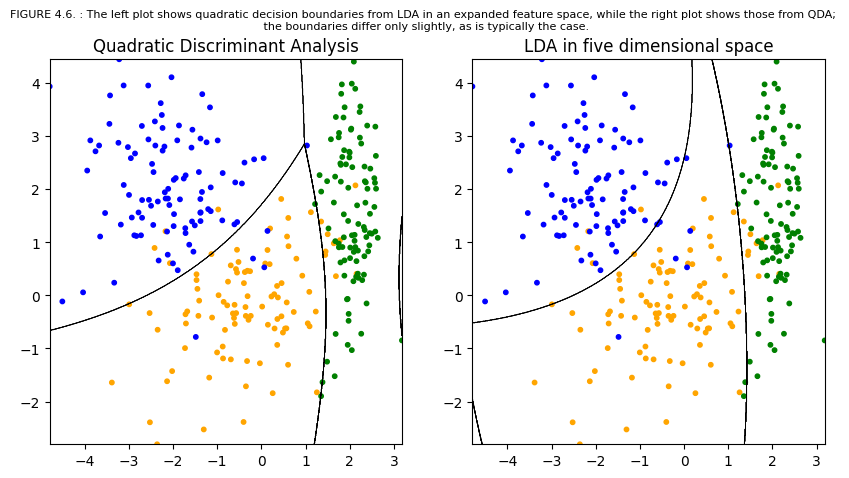

In [ ]:
np.random.seed(1)
mu1, mu2, mu3 = np.array([0, 0]), np.array([-2, 2]), np.array([2, 1.5])
sigma_1, sigma_2, sigma_3 = np.array([[2, 0.5], [0.5, 1]]), np.array([[1, 0], [0, 1]]), np.array([[0.1, 0.05], [0.05, 2]])


# Simulatation of the 3 multivariate gaussian
N = 100
Z = np.concat([np.random.multivariate_normal(mu1, sigma_1, size = N),
               np.random.multivariate_normal(mu2, sigma_2, size = N),
               np.random.multivariate_normal(mu3, sigma_3, size = N)])
Y = np.concat([np.zeros(N), np.ones(N), 2*np.ones(N)]).astype(int)
colors = np.array(['orange', 'blue', 'green'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
xmin, xmax = Z[:, 0].min() , Z[:, 0].max()
ymin, ymax = Z[:, 1].min() , Z[:, 1].max()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
zz = np.c_[xx.flatten(), yy.flatten()]




## LEFT PANEL
# Quadratic Discriminant Analysis
ax1.scatter(Z[:, 0], Z[:, 1], c = colors[Y], s = 10)
qda = QuadraticDiscriminantAnalysis()
qda.fit(Z, Y)
pred_zz = qda.predict(zz).reshape(xx.shape)
ax1.contour(xx, yy, pred_zz, colors = 'k', linewidths = 0.5)
ax1.set_title('Quadratic Discriminant Analysis')


## RIGHT PANEL
# LDA in five dimensional space X1, X2, X1**2, X2**2, X1*X2
ax2.scatter(Z[:, 0], Z[:, 1], c = colors[Y], s = 10)
lda = LinearDiscriminantAnalysis()
lda.fit(np.c_[Z, Z**2, Z[:, 0]*Z[:, 1]], Y)
pred_zz = lda.predict(np.c_[zz, zz**2, zz[:, 0]*zz[:, 1]]).reshape(xx.shape)
ax2.contour(xx, yy, pred_zz, colors = 'k', linewidths = 0.5)
ax2.set_title('LDA in five dimensional space')

fig.suptitle('FIGURE 4.6. : The left plot shows quadratic decision boundaries from LDA in an expanded feature space, while the right plot shows those from QDA; \n the boundaries differ only slightly, as is typically the case.', size = 8)
plt.show()


In [ ]:
pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.3 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=e50ab98efc29d37febb2095f122ab44e5cf82912b64e8b285efdae59646a703f
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [ ]:
# Vowel Recognition in UCI/Statlog

import openml
from sklearn.preprocessing import LabelEncoder

# Importing the Data
vowel = openml.datasets.get_dataset(307)  # Vowel dataset (Statlog)
X, y, _, _ = vowel.get_data(target=vowel.default_target_attribute)
df = X.copy()
df = df.iloc[:, 2:]
X = X.iloc[:, 2:].to_numpy()
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)
N = len(df)
K = 11


In [ ]:
# 4.3.3 Reduced Rank Lineaer Discriminant Analysis
mus = df.groupby(y).mean().to_numpy() # The K*p matrix of class centroids M
W = df.groupby(y).apply(lambda u : u.cov().to_numpy() * (len(u)-1)).sum() / (N- K) # The Common covariance matrix
B = np.cov(mus, rowvar = False)
mus_star  = mus @ np.linalg.inv(sqrtm(W))
B_star = np.cov(mus_star, rowvar = False)
V_star, D, _ = np.linalg.svd(B_star)
V = np.linalg.inv(sqrtm(W)) @ V_star
Z = X @ V
mus_z = mus @ V
print('Eigenvalues :', D)


Eigenvalues : [3.79949550e+00 2.99771342e+00 2.05929708e-01 1.19791419e-01
 4.90409926e-02 2.93361921e-02 1.54842686e-02 1.05585162e-02
 3.56035462e-03 3.77757491e-07]


/tmp/ipython-input-308147471.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", K)


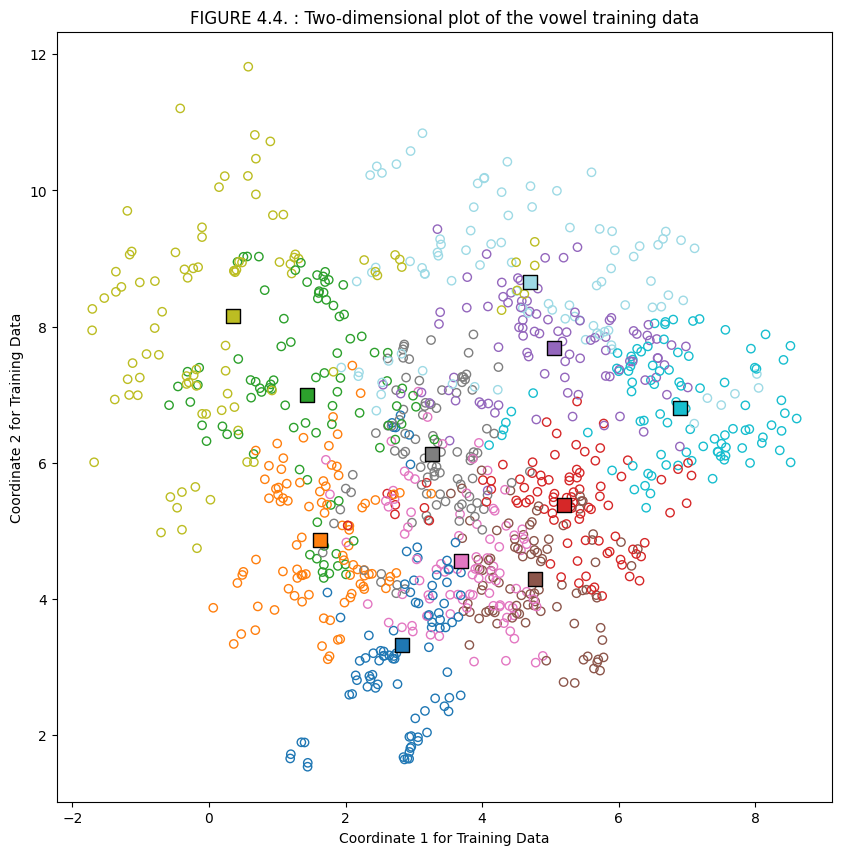

In [ ]:
# FIGURE 4.4.
# A two-dimensional plot of the vowel training data. There are eleven classes with X in R^10,
# and this is the best view in terms of an LDA model (Section 4.3.3).
# The heavy squares represent the projected mean vectors for each class. The class overlap is considerable.
cmap = plt.cm.get_cmap("tab20", K)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Z[:, 0], Z[:, 1],  edgecolor = cmap(y), facecolors="none")
ax.scatter(mus_z[:, 0], mus_z[:, 1], c = np.arange(K), cmap="tab20", marker = 's', s = 100, edgecolor="k")
ax.set_xlabel('Coordinate 1 for Training Data')
ax.set_ylabel('Coordinate 2 for Training Data')
ax.set_title('FIGURE 4.4. : Two-dimensional plot of the vowel training data')
plt.show()

In [ ]:
# Implementation of the Regularizd Discriminant Analysis (Friedman 1989) - CHAT GPT GENERATED

class RDA(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.5, gamma=0.0, priors=None, reg_eps=1e-6, standardize=False):
        self.alpha = alpha          # in [0,1]: blend class vs pooled cov
        self.gamma = gamma          # in [0,1]: extra shrinkage to identity
        self.priors = priors        # array-like or None
        self.reg_eps = reg_eps      # small ridge for stability
        self.standardize = standardize

    def _compute_cov(self, X, mu):
        Z = X - mu
        n = X.shape[0]
        return (Z.T @ Z) / max(n - 1, 1)

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y)
        n, p = X.shape
        self.n_features_in_ = p

        # optional standardization
        if self.standardize:
            mu = X.mean(axis=0)
            sd = X.std(axis=0, ddof=0)
            sd[sd == 0] = 1.0
            X = (X - mu) / sd
            self._scaler_ = (mu, sd)
        else:
            self._scaler_ = None

        classes, y_idx = np.unique(y, return_inverse=True)
        K = len(classes)
        self.classes_ = classes

        # class means
        means = np.zeros((K, p))
        counts = np.bincount(y_idx)
        for k in range(K):
            means[k] = X[y_idx == k].mean(axis=0)
        self.means_ = means

        # pooled covariance
        Sp = np.zeros((p, p))
        for k in range(K):
            Xk = X[y_idx == k]
            Sk = self._compute_cov(Xk, means[k])
            Sp += (counts[k] - 1) * Sk
        Sp /= max(n - K, 1)

        # class covariances
        Sks = []
        for k in range(K):
            Xk = X[y_idx == k]
            Sks.append(self._compute_cov(Xk, means[k]))

        # priors
        if self.priors is None:
            priors = counts / counts.sum()
        else:
            priors = np.asarray(self.priors, dtype=float)
            priors = priors / priors.sum()
        self.priors_ = priors

        # build RDA covariances and precompute inverses/logdets
        self.cov_k_ = []
        self.cov_inv_k_ = []
        self.logdet_k_ = []

        I = np.eye(p)
        traceSp = np.trace(Sp)

        for k in range(K):
            # Σ_k^(α) = α S_k + (1-α) S_p
            Sk_alpha = self.alpha * Sks[k] + (1.0 - self.alpha) * Sp
            # optional γ shrinkage to identity
            if self.gamma > 0.0:
                target = (traceSp / p) * I
                Sk_alpha = (1.0 - self.gamma) * Sk_alpha + self.gamma * target
            # small ridge to ensure SPD
            Sk_alpha = Sk_alpha + self.reg_eps * I

            # eigendecomp for inverse/logdet
            evals, evecs = eigh(Sk_alpha)
            evals = np.maximum(evals, 1e-12)
            inv = (evecs * (1.0 / evals)) @ evecs.T
            sign, logdet = slogdet(Sk_alpha)

            self.cov_k_.append(Sk_alpha)
            self.cov_inv_k_.append(inv)
            self.logdet_k_.append(logdet)

        self.logdet_k_ = np.asarray(self.logdet_k_)
        return self

    def _transform_X(self, X):
        X = np.asarray(X, dtype=float)
        if getattr(self, "_scaler_", None) is not None:
            mu, sd = self._scaler_
            X = (X - mu) / sd
        return X

    def decision_function(self, X):
        X = self._transform_X(X)
        n = X.shape[0]
        K = len(self.classes_)
        scores = np.zeros((n, K))
        for k in range(K):
            inv = self.cov_inv_k_[k]
            mu_k = self.means_[k]
            diff = X - mu_k
            quad = np.einsum('ni,ij,nj->n', diff, inv, diff)  # (x-μ)^T Σ^{-1} (x-μ)
            scores[:, k] = -0.5 * self.logdet_k_[k] - 0.5 * quad + np.log(self.priors_[k])
        return scores

    def predict_proba(self, X):
        scores = self.decision_function(X)
        m = scores.max(axis=1, keepdims=True)
        P = np.exp(scores - m)
        P /= P.sum(axis=1, keepdims=True)
        return P

    def predict(self, X):
        scores = self.decision_function(X)
        idx = scores.argmax(axis=1)
        return self.classes_[idx]


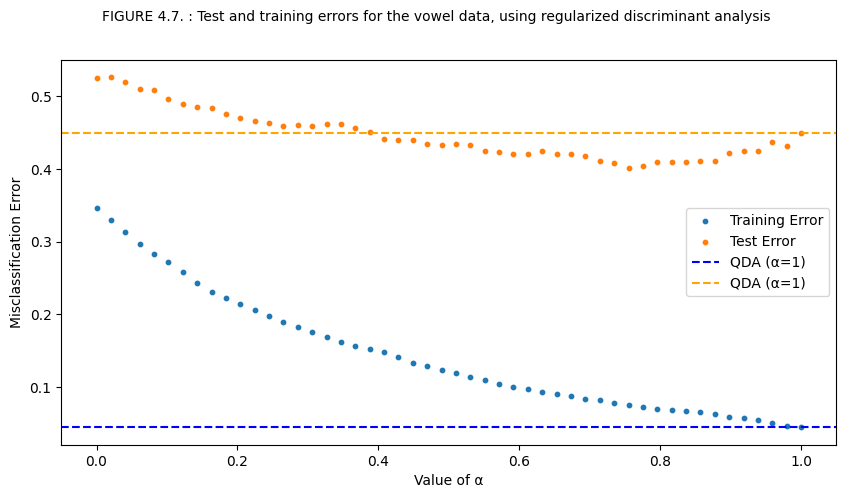

In [ ]:
# FIGURE 4.7.
# Test and training errors for the vowel data, using regularized
# discriminant analysis with a series of values of α ∈ [0, 1].

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate



alphas = np.linspace(0, 1, 50)
train_errors = np.zeros(len(alphas))
test_errors = np.zeros(len(alphas))
for i, alpha in enumerate(alphas):
  rda = RDA(alpha=alpha, gamma=0.0, standardize=True)
  scores = cross_validate(rda, X, y, cv = 5, return_train_score = True, scoring="accuracy")
  train_errors[i] = 1 - scores['train_score'].mean()
  test_errors[i] = 1 - scores['test_score'].mean()

qda = QuadraticDiscriminantAnalysis()
scores = cross_validate(qda, X, y, cv = 5, return_train_score = True, scoring="accuracy")




fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(alphas, train_errors, label = 'Training Error', s = 10)
ax.scatter(alphas, test_errors, label = 'Test Error', s = 10)
ax.axhline(y =  train_errors[-1], color="blue", linestyle="--", label="QDA (α=1)")
ax.axhline(y =  test_errors[-1], color="orange", linestyle="--", label="QDA (α=1)")
ax.legend()

ax.set_xlabel('Value of α')
ax.set_ylabel('Misclassification Error')
fig.suptitle('FIGURE 4.7. : Test and training errors for the vowel data, using regularized discriminant analysis', size = 10)
plt.show()

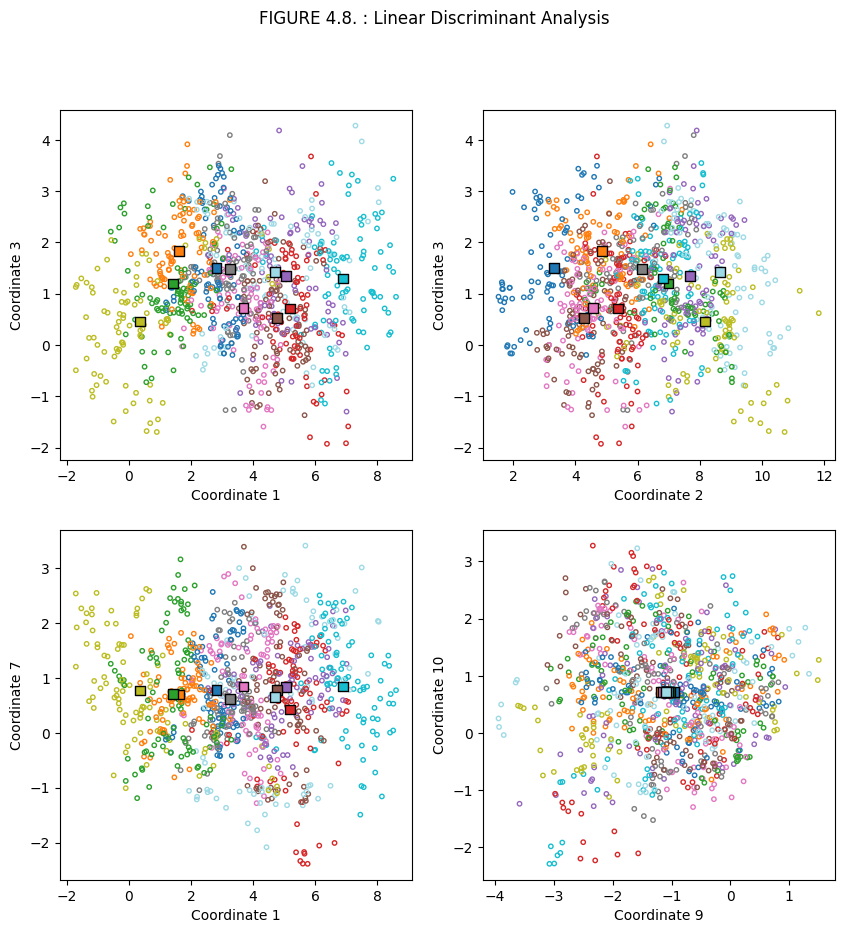

In [ ]:
# FIGURE 4.8 : Four projectiobs onto pairs of canonical variates / discriminant variables.
# Notice that as the rank of the canonical variates increases, the centroids become less spread out.
# In the lower right panel they appear to be superimposed, and the classes most confused

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
pairs = [[(0, 2), (1, 2)], [(0, 6), (8, 9)]]
for i in range(2) :
  for j in range(2) :
    ax = axes[i, j]
    k, l = pairs[i][j]
    ax.scatter(Z[:,k], Z[:, l],edgecolor = cmap(y), facecolors="none", s=10)
    ax.scatter(mus_z[:, k], mus_z[:, l], c = np.arange(K), cmap="tab20", marker = 's', s = 50, edgecolor="k")
    ax.set_xlabel(f'Coordinate {k+1}')
    ax.set_ylabel(f'Coordinate {l+1}')
fig.suptitle('FIGURE 4.8. : Linear Discriminant Analysis')
plt.show()


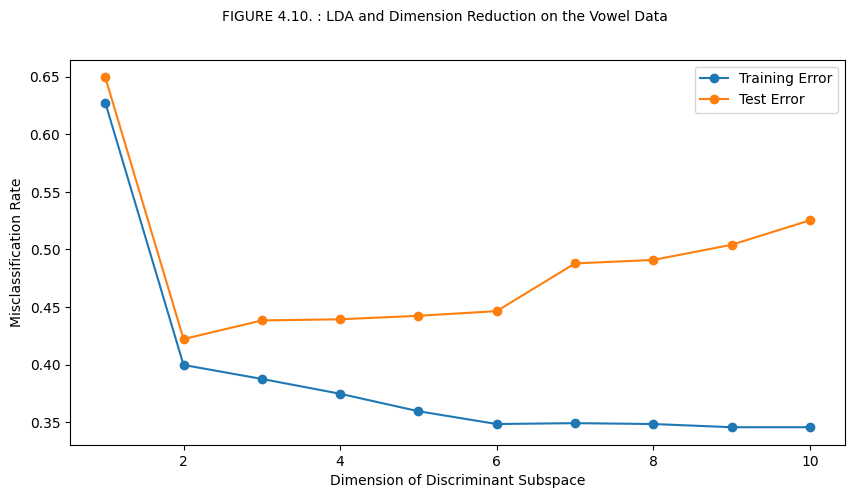

In [ ]:
# FIGURE 4.10. Training and test error rates for the vowel data, as a function
# of the dimension of the discriminant subspace. In this case the best error rate is
# for dimension 2.

fig, ax = plt.subplots(figsize = (10, 5))
train_errors = np.zeros(10)
test_errors = np.zeros(10)
for i in range(10) :
  lda = LinearDiscriminantAnalysis()
  cv = cross_validate(lda, Z[:, :i+1], y, cv = 5, return_train_score = True, scoring="accuracy")
  train_errors[i] = 1 - cv['train_score'].mean()
  test_errors[i] = 1 -  cv['test_score'].mean()
ax.plot(np.arange(1, 11), train_errors, label = 'Training Error', marker='o')
ax.plot(np.arange(1, 11), test_errors, label = 'Test Error', marker='o')
ax.set_xlabel('Dimension of Discriminant Subspace')
ax.set_ylabel('Misclassification Rate')
fig.suptitle('FIGURE 4.10. : LDA and Dimension Reduction on the Vowel Data', size = 10)
ax.legend()
plt.show()

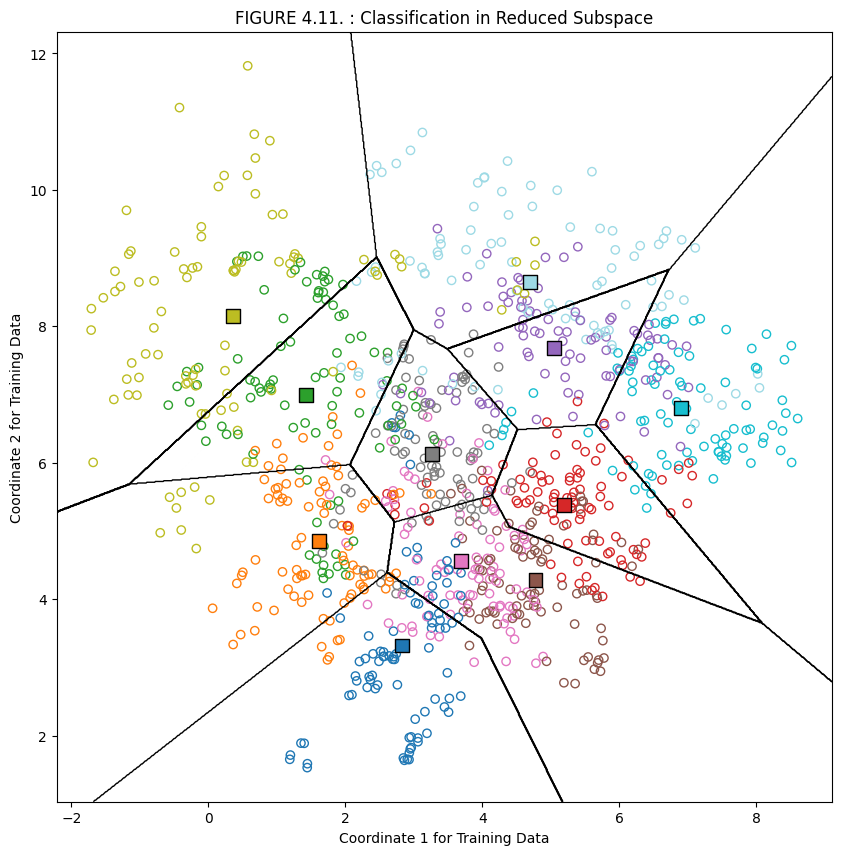

In [ ]:
# FIGURE 4.11. Decision boundaries for the vowel training data,
# in the two-dimensional subspace spanned by the first two canonical variates.
# Note that in any higher-dimensional subspace, the decision boundaries are higher-dimensional
# affine planes, and could not be represented as lines

lda = LinearDiscriminantAnalysis().fit(Z[:, :2], y)


fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Z[:, 0], Z[:, 1],  edgecolor = cmap(y), facecolors="none")
ax.scatter(mus_z[:, 0], mus_z[:, 1], c = np.arange(K), cmap="tab20", marker = 's', s = 100, edgecolor="k")
xmin, xmax = Z[:, 0].min()-0.5 , Z[:, 0].max()+0.5
ymin, ymax = Z[:, 1].min()-0.5, Z[:, 1].max()+0.5
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))
zz = np.c_[xx.flatten(), yy.flatten()]
zz = lda.predict(zz).reshape(xx.shape)
ax.contour(xx, yy, zz, colors = 'k', linewidths = 1)
ax.set_xlabel('Coordinate 1 for Training Data')
ax.set_ylabel('Coordinate 2 for Training Data')
ax.set_title('FIGURE 4.11. : Classification in Reduced Subspace')
plt.show()

## South African Heart Disease

In [ ]:
#Importing the SAheart dataset
url = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data"
df = pd.read_csv(url)
y = df['chd'].to_numpy()
df.drop(columns=['row.names', 'adiposity', 'typea'], inplace=True)
df['famhist'] = df['famhist'].map({'Present': 1, 'Absent': 0})

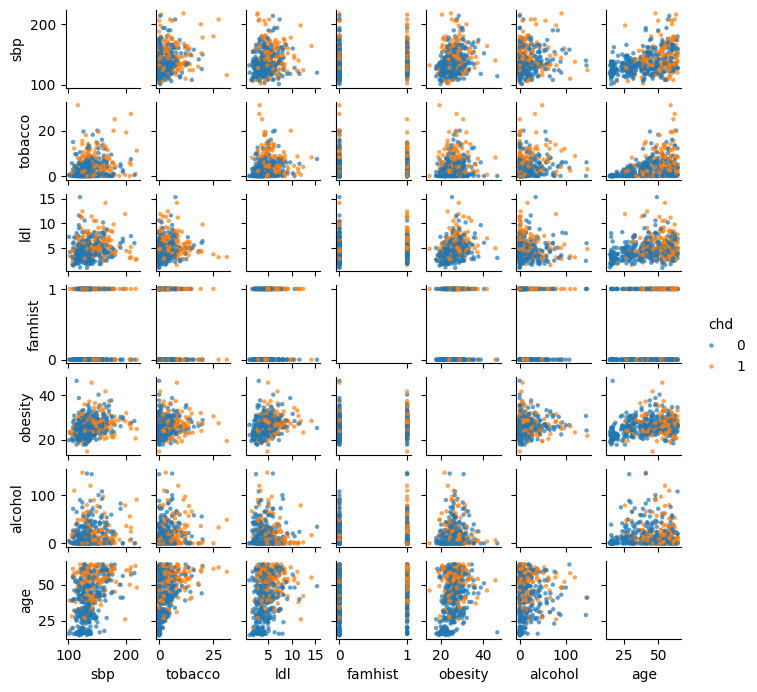

In [ ]:
# FIGURE 4.12 : A scatterplot matrix of the South African heart disease data.
# Each plot shows a pair of risk factors, and the cases and controls are color coded (orange is a case)
# The variable family history of heart disease (famhist) is binary (yes or no)
g = sns.pairplot(
    df, hue="chd",
    diag_kind="none",
    palette="tab10",
    plot_kws=dict(s=10, alpha=0.7, edgecolor="none"),
    diag_kws=dict(fill=True, alpha=0.5),
    height = 1,
)
plt.show()
df.drop(columns=['chd'], inplace=True)


In [ ]:
# TABLE 4.2 Results from a logistic regression fit to the South African heart disease data.

# My observation :
# The challenge is how to compute the std Error of the LR parameters, and henc the Z score


# Method 1 : Fisher information - Asymptotic of the MLE
# I(beta) = 1/n * (-Hessian(l(beta, Y, X))) = 1/n * (X.T @ W @ X) (See book ESL - Page 121)
# Beta_hat approx N(beta, 1/n * I(beta).inv)

X = df.to_numpy()
def logistic_regression_fit(X, y, columns):
  lr = LogisticRegression(max_iter=1000, random_state=51).fit(X,y)
  beta_hat =  np.concat([lr.intercept_, lr.coef_.flatten()])
  X = np.c_[np.ones(len(X)), X]
  p_hat = 1 / (1 + np.exp(-X @ beta_hat))
  Fisher_info = X.T @ np.diag(p_hat * (1 - p_hat)) @ X / len(X)
  cov_beta = np.linalg.inv(Fisher_info) / len(X)
  se_beta = np.sqrt(np.diag(cov_beta))
  z_test = beta_hat / se_beta
  tab = pd.DataFrame(np.c_[beta_hat, se_beta, z_test].round(3), index = ["(intercept)"] + columns, columns = ['Coefficient', 'Std. Error', 'Z score'])
  return tab

print( "method 1 : Fisher Information \n")
print(logistic_regression_fit(X, y, df.columns.to_list()))


# Method 2 : Use Bootstrap to compute the std of the logistic parameters
def bootstrap_logit_fit(X, y, columns, B=500):
  n = len(y)
  betas = []
  for _ in range(B):
      idx = np.random.choice(n, n, replace=True)   # resample indices
      Xb, yb = X[idx], y[idx]
      lr = LogisticRegression(max_iter=1000, random_state=55).fit(Xb, yb)
      betas.append(np.concat([lr.intercept_, lr.coef_.flatten()]))
  betas = np.array(betas)
  beta_hat = betas.mean(axis=0)
  se_beta = betas.std(axis=0)
  z_test = beta_hat / se_beta
  tab = pd.DataFrame(np.c_[beta_hat, se_beta, z_test].round(3), index = ["(intercept)"] + columns, columns = ['Coefficient', 'Std. Error', 'Z score'])
  return tab

print( "\nmethod 2 : Bootstrap \n")
print(bootstrap_logit_fit(X, y, df.columns.to_list()))

# method 3 : Use statsmodels.api Library
import statsmodels.api as sm
model = sm.Logit(y, X).fit()

print( "\nmethod 3 : statsmodel.api Library \n")
print(model.summary())



method 1 : Fisher Information 

             Coefficient  Std. Error  Z score
(intercept)       -4.116       0.962   -4.279
sbp                0.006       0.006    1.014
tobacco            0.079       0.026    3.020
ldl                0.185       0.057    3.221
famhist            0.894       0.224    3.984
obesity           -0.034       0.029   -1.175
alcohol            0.001       0.004    0.150
age                0.043       0.010    4.206

method 2 : Bootstrap 

             Coefficient  Std. Error  Z score
(intercept)       -4.180       1.034   -4.043
sbp                0.006       0.006    0.950
tobacco            0.079       0.027    2.910
ldl                0.193       0.060    3.251
famhist            0.901       0.218    4.138
obesity           -0.035       0.033   -1.069
alcohol            0.001       0.005    0.182
age                0.043       0.010    4.215
Optimization terminated successfully.
         Current function value: 0.543515
         Iterations 6

method 3 : st

In [ ]:
# TABLE 4.3. Results from stepwise logistic regression fit to the South African Heart Disease data

columns = ["(intercept)"] + df.columns.to_list()
while True :
  X = df[columns[1:]].to_numpy()
  tab = logistic_regression_fit(X, y, columns[1:])
  idx = np.argmin(np.abs(tab['Z score']))
  zmin = tab.loc[columns[idx], 'Z score']
  if abs(zmin) > 2 :
    break
  columns.pop(idx)
print(logistic_regression_fit(X, y, columns[1:]))


             Coefficient  Std. Error  Z score
(intercept)       -4.188       0.497   -8.430
tobacco            0.080       0.025    3.150
ldl                0.168       0.054    3.098
famhist            0.880       0.223    3.952
age                0.044       0.010    4.546


In [ ]:
X = df.to_numpy()


In [ ]:
# L1 - Regularized Logistic Regression

from sklearn.preprocessing import StandardScaler

X = df.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

lmds = np.exp(np.linspace(-1, 10, 500)) # Start from a small positive lambda to avoid division by zero
betas = []
for i, lmd in enumerate(lmds) :
  lr = LogisticRegression(penalty='l1',solver = 'liblinear', C=1/lmd, random_state=54).fit(X, y)
  betas.append(lr.coef_.flatten())
betas = np.array(betas)

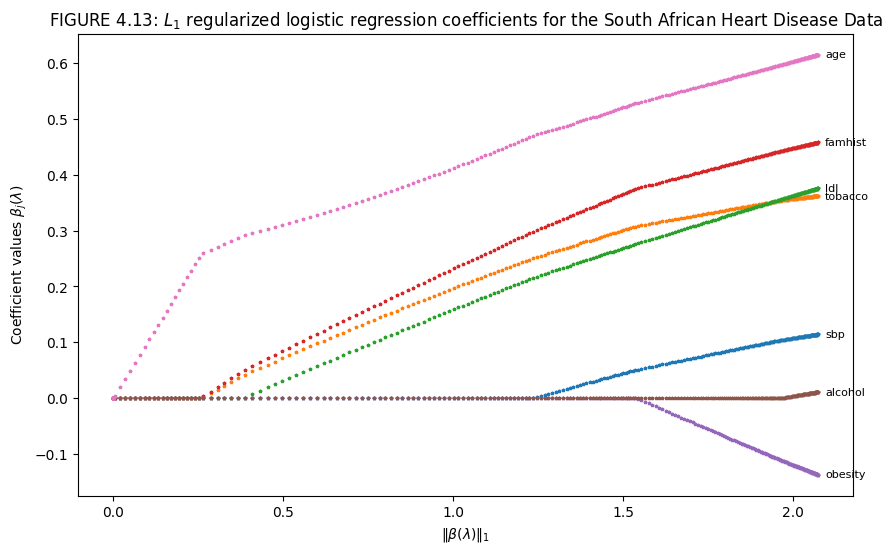

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap("tab10")
beta_L1 = np.sum(np.abs(betas), axis=1)
# iterate over features
for i, feature in enumerate(df.columns.to_list()):
    ax.plot(beta_L1, betas[:, i],color=cmap(i), marker = '*',linestyle = "none",ms = 2.5)
    ax.text(beta_L1[0]*1.01, betas[:, i][0], feature, color='black', fontsize=8, va="center")


ax.set_xlabel(r"$\|\beta(\lambda)\|_1$")
ax.set_ylabel(r"Coefficient values $\beta_j(\lambda)$")
ax.set_title(r"FIGURE 4.13: $L_1$ regularized logistic regression coefficients for the South African Heart Disease Data")
plt.show()


# 4.5 Separating Hyperplanes

## Perceptron Learning Algorithm


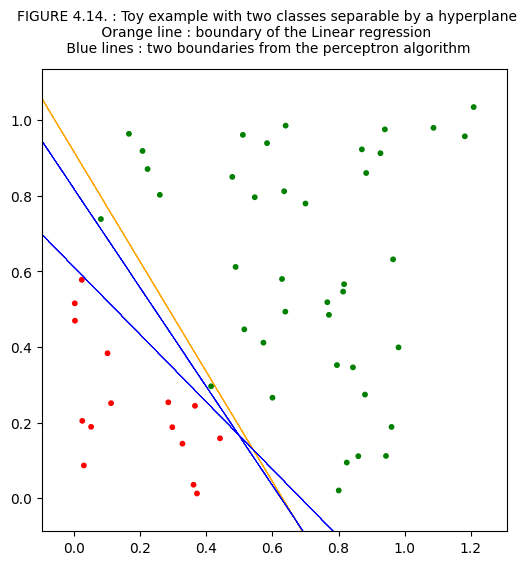

In [ ]:
# FIGURE 4.14 toy example with two classes separable by a hyperplane.
#  The orange line is the least squares solution, which misclassifies some of the training points.
# Also shown are two blue separating hyperplanes found by the perceptron learning algorithm with different random starts

# Generating the Data :
np.random.seed(5)
X = np.random.uniform(0, 1, size = (50, 2))
a, b = 0.65, 0.7
indices = np.where((X[:, 0] + X[:, 1] < a) | (X[:, 0] + X[:, 1] > b))[0]
X = X[indices, :].reshape((len(indices), 2))
X = np.vstack([X, np.random.normal(1, 0.1, size = (5, 2)) ]) # Here we add some outliers at (1, 1) to squew the linear regression
y = ((X[:, 0] + X[:, 1]> b)).astype(int)

# Scatter Plot
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(X[:, 0] , X[:, 1], color = np.where(y==0, 'red', 'green'), s = 10)

xmin, xmax = X[:, 0].min()-0.1 , X[:, 0].max()+0.1
ymin, ymax = X[:, 1].min()-0.1, X[:, 1].max()+0.1
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 1000), np.linspace(ymin, ymax, 1000))

zz = np.c_[xx.flatten(), yy.flatten()]

# Least Square Boundary y = -1/1
lr = LinearRegression().fit(X, 2*y-1)
ax.contour(xx, yy, (lr.predict(zz).reshape(xx.shape) > 0).astype(int), colors = 'orange', linewidths = 0.5)


# Separting Hyperplane with the perceptron learning algorithm

from sklearn.linear_model import Perceptron
model1 = Perceptron(random_state=1).fit(X, 2*y-1)
ax.contour(xx, yy, (model1.predict(zz).reshape(xx.shape) > 0).astype(int), colors = 'blue', linewidths = 0.5)

model2 = Perceptron(random_state=2).fit(X, 2*y-1)
ax.contour(xx, yy, (model2.predict(zz).reshape(xx.shape) > 0).astype(int), colors = 'blue', linewidths = 0.5)
fig.suptitle('FIGURE 4.14. : Toy example with two classes separable by a hyperplane\n Orange line : boundary of the Linear regression \n Blue lines : two boundaries from the perceptron algorithm', fontsize = 10)
plt.show()
# Perceptron learning algorithm
# xi, yi data point where yi = \pm
# Objective function to maximize J(beta) =  sum yi * (beta.T @ xi) (with the intercept)
# Gradiant Grad(beta) = sum yi xi
# Stochastric Gradiant Descent : beta <- beta + rho yi xi


# Optimal Separating Hyperplane

We want to separate the points as much as possible

\begin{equation}
\begin{aligned}
\underset{\beta, \beta_{0}, ||\beta|| = 1}{\text{maximize}} & \quad M \\
\text{subject to} & \quad y_i\big(\mathbf{x}_i^{\top}\beta + \beta_{0}\big) \ge M, \quad i=1,\ldots,n
\end{aligned}
\end{equation}

We can get rid of the condition $||\beta|| = 1$, by imposing  $ \frac{1}{||\beta||} y_i\big(\mathbf{x}_i^{\top}\beta + \beta_{0}\big) \ge M$, thus $$y_i\big(\mathbf{x}_i^{\top}\beta + \beta_{0}\big) \ge M ||\beta||$$

Since we can choose to scale our $beta$ and $beta_{0}$ as we like, and the problem will be equivalent. So we can choose to put $M||\beta|| = 1$, thus $M =\frac{1}{||\beta||}$.

The problem transform to

\begin{equation}
\begin{aligned}
\underset{\beta, \beta_{0}}{\text{minimze}} & \quad \frac{1}{2} ||\beta||^2  \\
\text{subject to} & \quad y_i\big(\mathbf{x}_i^{\top}\beta + \beta_{0}\big) \ge 1, \quad i=1,\ldots,n
\end{aligned}
\end{equation}


In [241]:
model.coef_

array([[2.27443736, 1.85609094]])

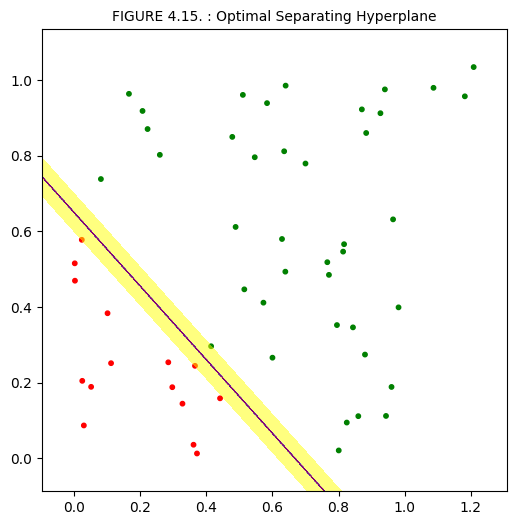

In [268]:
-# The same data as in Figure 4.14. The shaded region delineates
# the maximum margin separating the two classes. There are three support points
# indicated, which lie on the boundary of the margin, and the optimal separating
# hyperplane (blue line) bisects the slab. Included in the figure is the boundary found
# using logistic regression (red line), which is very close to the optimal separating
# hyperplane (see Section 12.3.3).

from sklearn.svm import LinearSVC,  SVC

model = LinearSVC(C=1000000, tol=1e-12, max_iter=1000000).fit(X, 2*y-1)
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(X[:, 0] , X[:, 1], color = np.where(y==0, 'red', 'green'), s = 10)
ax.contour(xx, yy, model.predict(zz).reshape(xx.shape), colors = 'blue', linewidths = 0.5)
ZZ = model.intercept_ + model.coef_ @ zz.T
ax.contourf(xx, yy, ZZ.reshape(xx.shape), levels = [-1, 1], colors = ['Yellow'], alpha = 0.5)

# Logistic Regression boundary
lr = LogisticRegression(max_iter=100000).fit(X, y)
ax.contour(xx, yy, model.predict(zz).reshape(xx.shape), colors = 'red', linewidths = 0.1)

ax.set_title('FIGURE 4.15. : Optimal Separating Hyperplane', fontsize = 10)
plt.show()
